# Vanishing Gradient Problem

This is project is about demonstaring the "Vanishing Gradient problem".


## What is "vanishing Gradient Problem" ?

* It occurs during neural network training when the gradients used for updating weights in backpropagation become extremly small as they pass through multiple layers of a deep network.
* This cause the weights in the initial layers to be updated very slowly or not at all, stalling the learning process as preventing the model from learning complex features and converging to an optimal solution.
  

## How to recognize it?
* There is no change in loss for number of epochs.
* By plotting the weights we can observe this problem.


## Handling Vanishing Gradient problem

* we can handle the vanishing Gradient problem by :
    * Reducing the model complexity (but number of layers is less it may effect in detecting the complex patterns)
    * using ReLU activation function
    * proper weight initialization techniques
    * batch Normalization
    * using a residual network


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import make_moons
import torch.optim as optim

In [2]:
# Creating the dataset
x,y = make_moons(n_samples = 200, noise = 0.05, random_state = 20)

In [3]:
x.shape

(200, 2)

In [4]:
y.shape

(200,)

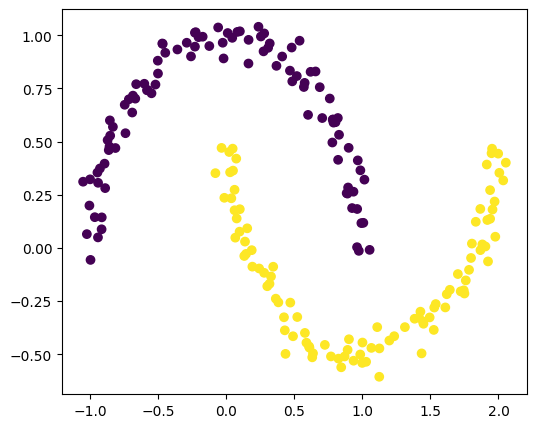

In [5]:
# Plotting the dataset

plt.figure(figsize=(6,5))
plt.scatter(x = x[:,0], y = x[:,1], c = y)
plt.show()

In [6]:
# Checking GPU Access
device = torch.device("cuda" if torch.cuda.is_available() else "CPU")
print(f"Using '{device}'")

Using 'cuda'


In [7]:
# Creating Neural Network

class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features,10),
            nn.Sigmoid(),
            nn.Linear(10,10),
            nn.Sigmoid(),
            nn.Linear(10,10),
            nn.Sigmoid(),
            nn.Linear(10,10),
            nn.Sigmoid(),
            nn.Linear(10,10),
            nn.Sigmoid(),
            nn.Linear(10,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.model(x)
    

In [8]:
# Converting numpy arrays to tensors

x_tensor = torch.tensor(x, dtype = torch.float32).to(device)
y_tensor = torch.tensor(y, dtype = torch.float32).view(-1,1).to(device)

In [9]:
# Initializing the model
model = MyNN(x_tensor.shape[1])
model.to(device)

# Initalizing loss function
loss_fn = nn.BCEWithLogitsLoss()

# Initializing optimizer
optim = torch.optim.SGD(model.parameters(),lr = 0.1)

In [10]:
# Training the model

epochs = 100

for epoch in range(epochs):

    # Forward pass
    y_pred = model(x_tensor)

    # Loss
    loss = loss_fn(y_pred,y_tensor)

    # backpropagation
    optim.zero_grad()
    loss.backward()

    # Updating weights
    optim.step()

    if (epoch+1)%10 == 0 :
        print(f"epoch : {epoch+1} Loss : {loss}")
        print("Updated weights of the first layer after optimization : ")
        first_layer_weights = model.model[0].weight.data
        print(first_layer_weights)
        print("_"*30)
     

epoch : 10 Loss : 0.7217408418655396
Updated weights of the first layer after optimization : 
tensor([[ 0.3481,  0.6156],
        [ 0.6787,  0.4039],
        [ 0.1057, -0.4527],
        [-0.1241, -0.4310],
        [-0.0594, -0.1617],
        [-0.4718,  0.1939],
        [ 0.1159, -0.0301],
        [-0.2689,  0.6606],
        [-0.4884, -0.4550],
        [ 0.4502, -0.1699]], device='cuda:0')
______________________________
epoch : 20 Loss : 0.7183369994163513
Updated weights of the first layer after optimization : 
tensor([[ 0.3481,  0.6156],
        [ 0.6787,  0.4039],
        [ 0.1057, -0.4527],
        [-0.1241, -0.4310],
        [-0.0594, -0.1617],
        [-0.4718,  0.1939],
        [ 0.1159, -0.0301],
        [-0.2689,  0.6606],
        [-0.4884, -0.4550],
        [ 0.4502, -0.1699]], device='cuda:0')
______________________________
epoch : 30 Loss : 0.7153865694999695
Updated weights of the first layer after optimization : 
tensor([[ 0.3481,  0.6156],
        [ 0.6787,  0.4039],
    

# Observation

* we can observe that loss is not hanging gradually. The percentage of change is so less.
* The weights of the first layer are not changing effectiely because , the gradients are becoming so small in backpropgation so, they doesn't effecting in changing the weights.

# handling the vansihing Gradient problem

## 1 . By reducing the model complexity (Reducing the layers)

In [11]:
# Creating Neural Network

class MyNN2(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features,10),
            nn.Sigmoid(),
            nn.Linear(10,10),
            nn.Sigmoid(),
            nn.Linear(10,10),
            nn.Linear(10,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.model(x)
    

In [12]:
# Initializing the model
model_2 = MyNN2(x_tensor.shape[1])
model_2.to(device)

# Initalizing loss function
loss_fn = nn.BCEWithLogitsLoss()

# Initializing optimizer
optim = torch.optim.SGD(model_2.parameters(),lr = 0.1)

In [13]:
# Training the model

epochs = 100

for epoch in range(epochs):

    # Forward pass
    y_pred_2 = model_2(x_tensor)

    # Loss
    loss = loss_fn(y_pred_2,y_tensor)

    # backpropagation
    optim.zero_grad()
    loss.backward()

    # Updating weights
    optim.step()

    if (epoch+1)%10 == 0 :
        print(f"epoch : {epoch+1} Loss : {loss}")
        print("Updated weights of the first layer after optimization : ")
        first_layer_weights = model_2.model[0].weight.data
        print(first_layer_weights)
        print("_"*30)
     

epoch : 10 Loss : 0.7174600958824158
Updated weights of the first layer after optimization : 
tensor([[ 0.1511,  0.3477],
        [-0.5922,  0.6124],
        [ 0.3916,  0.3331],
        [ 0.0577,  0.5059],
        [-0.6005,  0.4990],
        [ 0.2896, -0.2165],
        [ 0.1495,  0.2856],
        [ 0.3845,  0.4048],
        [-0.1453, -0.1579],
        [-0.3580,  0.0284]], device='cuda:0')
______________________________
epoch : 20 Loss : 0.7153746485710144
Updated weights of the first layer after optimization : 
tensor([[ 0.1512,  0.3477],
        [-0.5922,  0.6124],
        [ 0.3916,  0.3330],
        [ 0.0574,  0.5062],
        [-0.6004,  0.4989],
        [ 0.2899, -0.2168],
        [ 0.1495,  0.2856],
        [ 0.3843,  0.4050],
        [-0.1453, -0.1579],
        [-0.3580,  0.0284]], device='cuda:0')
______________________________
epoch : 30 Loss : 0.7135069966316223
Updated weights of the first layer after optimization : 
tensor([[ 0.1512,  0.3476],
        [-0.5923,  0.6125],
    

# Observation 2
* We Reduced the number of layers in the neural network to handle the vansishing gradient problem.
* here, we can observe the weights of first layer is gradually changing.

## 2. using Relu Activation function

In [14]:
# Creating Neural Network

class MyNN3(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.model(x)
    

In [15]:
# Initializing the model
model_3 = MyNN3(x_tensor.shape[1])
model_3.to(device)

# Initalizing loss function
loss_fn = nn.BCEWithLogitsLoss()

# Initializing optimizer
optim = torch.optim.SGD(model_3.parameters(),lr = 0.1)

In [16]:
# Training the model

epochs = 100

for epoch in range(epochs):

    # Forward pass
    y_pred_3 = model_3(x_tensor)

    # Loss
    loss = loss_fn(y_pred_3,y_tensor)

    # backpropagation
    optim.zero_grad()
    loss.backward()

    # Updating weights
    optim.step()

    if (epoch+1)%10 == 0 :
        print(f"epoch : {epoch+1} Loss : {loss}")
        print("Updated weights of the first layer after optimization : ")
        first_layer_weights = model_3.model[0].weight.data
        print(first_layer_weights)
        print("_"*30)
     

epoch : 10 Loss : 0.7314940690994263
Updated weights of the first layer after optimization : 
tensor([[ 0.4240, -0.3672],
        [ 0.2786, -0.7036],
        [-0.3061,  0.4408],
        [ 0.4693, -0.1791],
        [-0.3322, -0.0302],
        [ 0.2086,  0.5110],
        [-0.1866, -0.5003],
        [ 0.3341,  0.3577],
        [-0.4358,  0.3584],
        [ 0.6763, -0.2900]], device='cuda:0')
______________________________
epoch : 20 Loss : 0.7299104332923889
Updated weights of the first layer after optimization : 
tensor([[ 0.4241, -0.3673],
        [ 0.2787, -0.7036],
        [-0.3061,  0.4408],
        [ 0.4694, -0.1793],
        [-0.3322, -0.0302],
        [ 0.2086,  0.5110],
        [-0.1865, -0.5003],
        [ 0.3343,  0.3574],
        [-0.4357,  0.3581],
        [ 0.6762, -0.2898]], device='cuda:0')
______________________________
epoch : 30 Loss : 0.7283692955970764
Updated weights of the first layer after optimization : 
tensor([[ 0.4242, -0.3674],
        [ 0.2789, -0.7036],
    

# Observation 3 
* we handled the vanishing gradient problem with ReLU Activation function
* We can observe that the gradients of first layer are changing grdaully.

# Summary

* The project is about vanishing grdaient problem and it is well demonstrated in this notebook.
    * **Observation 1 :**
    * We demonstared gradinet vanishing problem by creating a network with sigmoid as activation function.
* The, we started **handling the gradinet problem**
    * **Observation 2 :**
    * we **Reduced the complexity** of neural netowrk and observed changes in weights of firts layer.
    * **Obserbaton 3 :**
    * We used **ReLu activation function** and observed changes in weights of first layer.
* we can also apply other techniques to handle the problem.